In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# pd.options.display.max_rows = None

In [3]:
%matplotlib inline

In [4]:
headway = pd.read_csv('../data/Headway Data.csv')

In [5]:
headway.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,25,0.000000


### Question 6: How does direction of travel, route, or location affect the headway and on-time performance?

In [6]:
#pulling out direction of travel (to downtown)
direction_of_travel = headway[['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 'HDWY_DEV', 'ADHERENCE', 'DWELL_IN_MINS']]
direction_of_travel_TO = direction_of_travel.loc[(headway['ROUTE_DIRECTION_NAME']=='TO DOWNTOWN')]
direction_of_travel_TO

,DATE,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TRIP_EDGE,HDWY_DEV,ADHERENCE,DWELL_IN_MINS
0,2021-11-01,7,297750,TO DOWNTOWN,1,1.983333,-2.000000,12.650000
1,2021-11-01,7,297750,TO DOWNTOWN,0,3.333333,-3.350000,0.000000
2,2021-11-01,7,297750,TO DOWNTOWN,2,NaN,-20.183333,22.416666
3,2021-11-01,50,297749,TO DOWNTOWN,1,NaN,-0.283333,5.766666
4,2021-11-01,50,297749,TO DOWNTOWN,2,NaN,10.016666,0.000000
...,...,...,...,...,...,...,...,...
1981710,2022-11-01,50,329980,TO DOWNTOWN,2,NaN,-2.733333,1.016666
1981711,2022-11-01,50,330003,TO DOWNTOWN,1,-2.366667,12.900000,9.900000
1981712,2022-11-01,50,330003,TO DOWNTOWN,2,NaN,26.733333,0.000000
1981713,2022-11-01,56,330011,TO DOWNTOWN,1,NaN,0.966666,19.366666


In [7]:
#pulling out direction of travel (from downtown)
direction_of_travel = headway[['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 'HDWY_DEV', 'ADHERENCE', 'DWELL_IN_MINS']]
direction_of_travel_FROM = direction_of_travel.loc[(headway['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN')]
direction_of_travel_FROM

,DATE,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TRIP_EDGE,HDWY_DEV,ADHERENCE,DWELL_IN_MINS
9,2021-11-01,22,298162,FROM DOWNTOWN,1,NaN,-1.816666,11.383333
10,2021-11-01,22,298162,FROM DOWNTOWN,0,NaN,-0.866666,0.000000
11,2021-11-01,22,298162,FROM DOWNTOWN,2,NaN,-1.650000,0.000000
16,2021-11-01,22,298151,FROM DOWNTOWN,1,1.116666,-2.016666,11.366666
17,2021-11-01,22,298151,FROM DOWNTOWN,0,0.400000,-1.283333,0.000000
...,...,...,...,...,...,...,...,...
1981700,2022-11-01,7,329459,FROM DOWNTOWN,2,NaN,0.866666,0.000000
1981701,2022-11-01,50,329871,FROM DOWNTOWN,1,NaN,18.366666,0.000000
1981702,2022-11-01,50,329871,FROM DOWNTOWN,2,NaN,7.583333,0.000000
1981705,2022-11-01,50,329896,FROM DOWNTOWN,1,NaN,-3.900000,9.166666


In [8]:
#pulling out direction of travel (from downtown)
direction_of_travel = headway[['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 'HDWY_DEV', 'ADHERENCE', 'DWELL_IN_MINS']]
direction_of_travel_FROM1 = direction_of_travel.loc[(headway['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN')][(headway['TRIP_EDGE']==1)]
direction_of_travel_FROM1

C:\Users\sarah\AppData\Local\Temp\ipykernel_2652\3348706024.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  direction_of_travel_FROM1 = direction_of_travel.loc[(headway['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN')][(headway['TRIP_EDGE']==1)]


,DATE,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TRIP_EDGE,HDWY_DEV,ADHERENCE,DWELL_IN_MINS
9,2021-11-01,22,298162,FROM DOWNTOWN,1,NaN,-1.816666,11.383333
16,2021-11-01,22,298151,FROM DOWNTOWN,1,1.116666,-2.016666,11.366666
23,2021-11-01,22,298152,FROM DOWNTOWN,1,3.366666,-5.116666,3.883333
30,2021-11-01,22,298153,FROM DOWNTOWN,1,1.183333,-4.200000,9.333333
36,2021-11-01,22,298147,FROM DOWNTOWN,1,-2.316667,-3.616666,12.883333
...,...,...,...,...,...,...,...,...
1981686,2022-11-01,7,329447,FROM DOWNTOWN,1,2.000000,-3.016666,17.033333
1981692,2022-11-01,7,329458,FROM DOWNTOWN,1,6.000000,-4.416666,0.000000
1981698,2022-11-01,7,329459,FROM DOWNTOWN,1,-1.883334,-1.166666,0.000000
1981701,2022-11-01,50,329871,FROM DOWNTOWN,1,NaN,18.366666,0.000000


In [9]:
trip_edge1 = headway[['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 'HDWY_DEV', 'ADHERENCE', 'DWELL_IN_MINS']][(headway['TRIP_EDGE']==1)]
trip_edge1

,DATE,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TRIP_EDGE,HDWY_DEV,ADHERENCE,DWELL_IN_MINS
0,2021-11-01,7,297750,TO DOWNTOWN,1,1.983333,-2.000000,12.650000
3,2021-11-01,50,297749,TO DOWNTOWN,1,NaN,-0.283333,5.766666
5,2021-11-01,22,298143,TO DOWNTOWN,1,NaN,0.166666,12.333333
9,2021-11-01,22,298162,FROM DOWNTOWN,1,NaN,-1.816666,11.383333
12,2021-11-01,22,298128,TO DOWNTOWN,1,-0.366667,-1.050000,9.400000
...,...,...,...,...,...,...,...,...
1981705,2022-11-01,50,329896,FROM DOWNTOWN,1,NaN,-3.900000,9.166666
1981707,2022-11-01,55,329899,TO DOWNTOWN,1,NaN,0.800000,31.933333
1981709,2022-11-01,50,329980,TO DOWNTOWN,1,NaN,-2.600000,20.916666
1981711,2022-11-01,50,330003,TO DOWNTOWN,1,-2.366667,12.900000,9.900000


In [10]:
trip_edge2 = headway[['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 'HDWY_DEV', 'ADHERENCE', 'DWELL_IN_MINS']][(headway['TRIP_EDGE']==2)]
trip_edge2

,DATE,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TRIP_EDGE,HDWY_DEV,ADHERENCE,DWELL_IN_MINS
2,2021-11-01,7,297750,TO DOWNTOWN,2,NaN,-20.183333,22.416666
4,2021-11-01,50,297749,TO DOWNTOWN,2,NaN,10.016666,0.000000
8,2021-11-01,22,298143,TO DOWNTOWN,2,NaN,4.566666,0.000000
11,2021-11-01,22,298162,FROM DOWNTOWN,2,NaN,-1.650000,0.000000
15,2021-11-01,22,298128,TO DOWNTOWN,2,NaN,4.350000,0.000000
...,...,...,...,...,...,...,...,...
1981706,2022-11-01,50,329896,FROM DOWNTOWN,2,NaN,-5.833333,9.416666
1981708,2022-11-01,55,329899,TO DOWNTOWN,2,NaN,9.483333,0.000000
1981710,2022-11-01,50,329980,TO DOWNTOWN,2,NaN,-2.733333,1.016666
1981712,2022-11-01,50,330003,TO DOWNTOWN,2,NaN,26.733333,0.000000


In [11]:
trip_edge2.groupby('TRIP_EDGE')

In [12]:
trip_edge_df = headway[['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 'HDWY_DEV', 'ADHERENCE', 'DWELL_IN_MINS']][(headway['TRIP_EDGE']==2) | (headway['TRIP_EDGE']==1)]
trip_edge_df

,DATE,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TRIP_EDGE,HDWY_DEV,ADHERENCE,DWELL_IN_MINS
0,2021-11-01,7,297750,TO DOWNTOWN,1,1.983333,-2.000000,12.650000
2,2021-11-01,7,297750,TO DOWNTOWN,2,NaN,-20.183333,22.416666
3,2021-11-01,50,297749,TO DOWNTOWN,1,NaN,-0.283333,5.766666
4,2021-11-01,50,297749,TO DOWNTOWN,2,NaN,10.016666,0.000000
5,2021-11-01,22,298143,TO DOWNTOWN,1,NaN,0.166666,12.333333
...,...,...,...,...,...,...,...,...
1981710,2022-11-01,50,329980,TO DOWNTOWN,2,NaN,-2.733333,1.016666
1981711,2022-11-01,50,330003,TO DOWNTOWN,1,-2.366667,12.900000,9.900000
1981712,2022-11-01,50,330003,TO DOWNTOWN,2,NaN,26.733333,0.000000
1981713,2022-11-01,56,330011,TO DOWNTOWN,1,NaN,0.966666,19.366666


In [13]:
trip_edge_df.groupby(['ROUTE_DIRECTION_NAME', 'ROUTE_ABBR'], as_index=False)['ADHERENCE', 'DWELL_IN_MINS'].mean().round()

C:\Users\sarah\AppData\Local\Temp\ipykernel_2652\2638094957.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  trip_edge_df.groupby(['ROUTE_DIRECTION_NAME', 'ROUTE_ABBR'], as_index=False)['ADHERENCE', 'DWELL_IN_MINS'].mean().round()


,ROUTE_DIRECTION_NAME,ROUTE_ABBR,ADHERENCE,DWELL_IN_MINS
0,FROM DOWNTOWN,3,-2.0,6.0
1,FROM DOWNTOWN,7,-2.0,6.0
2,FROM DOWNTOWN,22,-1.0,6.0
3,FROM DOWNTOWN,23,-1.0,6.0
4,FROM DOWNTOWN,50,-1.0,6.0
5,FROM DOWNTOWN,52,-2.0,5.0
6,FROM DOWNTOWN,55,-2.0,5.0
7,FROM DOWNTOWN,56,-2.0,7.0
8,TO DOWNTOWN,3,-1.0,6.0
9,TO DOWNTOWN,7,-1.0,6.0


In [14]:
te_df1= trip_edge_df.groupby(['ROUTE_ABBR'], as_index=False)['ADHERENCE', 'DWELL_IN_MINS'].mean().round()
te_df1

C:\Users\sarah\AppData\Local\Temp\ipykernel_2652\2832202184.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  te_df1= trip_edge_df.groupby(['ROUTE_ABBR'], as_index=False)['ADHERENCE', 'DWELL_IN_MINS'].mean().round()


,ROUTE_ABBR,ADHERENCE,DWELL_IN_MINS
0,3,-2.0,6.0
1,7,-2.0,6.0
2,22,-0.0,5.0
3,23,-1.0,6.0
4,50,-1.0,7.0
5,52,-2.0,7.0
6,55,-2.0,7.0
7,56,-1.0,7.0


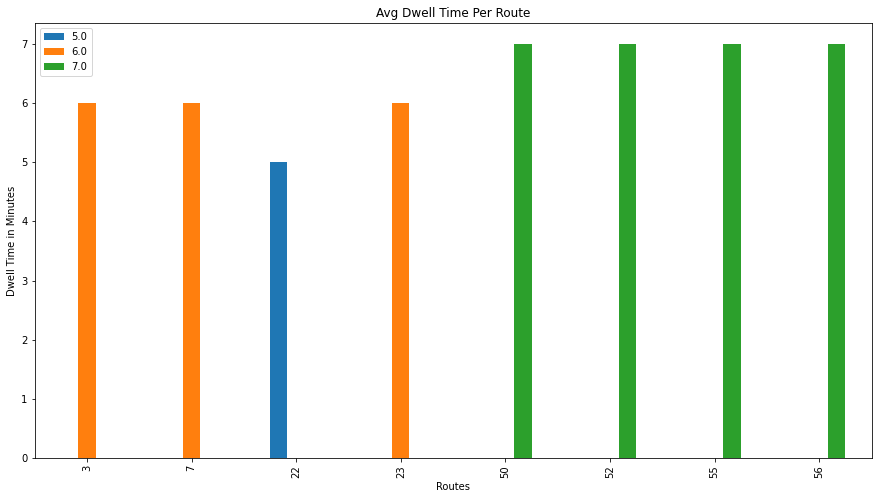

In [15]:
te_df1.pivot(index='ROUTE_ABBR', columns='DWELL_IN_MINS', values='DWELL_IN_MINS').plot(kind='bar', figsize=(15,8))
plt.xlabel('Routes')
plt.ylabel('Dwell Time in Minutes')
plt.legend(loc='upper left')
plt.title('Avg Dwell Time Per Route')
plt.show();

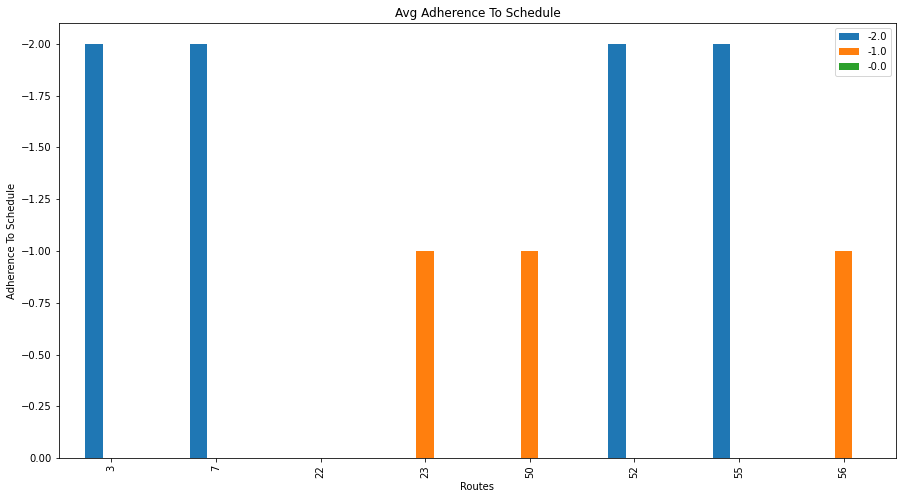

In [16]:
te_df1.pivot(index='ROUTE_ABBR', columns='ADHERENCE', values='ADHERENCE').plot(kind='bar', figsize=(15,8))
plt.xlabel('Routes')
plt.ylabel('Adherence To Schedule')
plt.legend(loc='upper right')
plt.title('Avg Adherence To Schedule')
plt.gca().invert_yaxis()
plt.show();

In [17]:
te_df2= trip_edge_df.groupby(['ROUTE_ABBR'], as_index=False)['ADHERENCE', 'DWELL_IN_MINS'].mean()
te_df2

C:\Users\sarah\AppData\Local\Temp\ipykernel_2652\1153527567.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  te_df2= trip_edge_df.groupby(['ROUTE_ABBR'], as_index=False)['ADHERENCE', 'DWELL_IN_MINS'].mean()


,ROUTE_ABBR,ADHERENCE,DWELL_IN_MINS
0,3,-1.620143,6.118815
1,7,-1.619213,6.073567
2,22,-0.333955,5.017273
3,23,-0.517772,5.805638
4,50,-1.370233,7.144658
5,52,-1.500892,6.821088
6,55,-2.140612,6.501161
7,56,-0.917926,7.365603


In [18]:
trip_edge_df_all = headway[['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 'HDWY_DEV', 'ADHERENCE', 'DWELL_IN_MINS']]
trip_edge_df

,DATE,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TRIP_EDGE,HDWY_DEV,ADHERENCE,DWELL_IN_MINS
0,2021-11-01,7,297750,TO DOWNTOWN,1,1.983333,-2.000000,12.650000
2,2021-11-01,7,297750,TO DOWNTOWN,2,NaN,-20.183333,22.416666
3,2021-11-01,50,297749,TO DOWNTOWN,1,NaN,-0.283333,5.766666
4,2021-11-01,50,297749,TO DOWNTOWN,2,NaN,10.016666,0.000000
5,2021-11-01,22,298143,TO DOWNTOWN,1,NaN,0.166666,12.333333
...,...,...,...,...,...,...,...,...
1981710,2022-11-01,50,329980,TO DOWNTOWN,2,NaN,-2.733333,1.016666
1981711,2022-11-01,50,330003,TO DOWNTOWN,1,-2.366667,12.900000,9.900000
1981712,2022-11-01,50,330003,TO DOWNTOWN,2,NaN,26.733333,0.000000
1981713,2022-11-01,56,330011,TO DOWNTOWN,1,NaN,0.966666,19.366666


In [19]:
te_df1all= trip_edge_df_all.groupby(['ROUTE_ABBR'], as_index=False)['ADHERENCE', 'DWELL_IN_MINS'].mean().round()
te_df1all

C:\Users\sarah\AppData\Local\Temp\ipykernel_2652\3215266680.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  te_df1all= trip_edge_df_all.groupby(['ROUTE_ABBR'], as_index=False)['ADHERENCE', 'DWELL_IN_MINS'].mean().round()


,ROUTE_ABBR,ADHERENCE,DWELL_IN_MINS
0,3,-2.0,2.0
1,7,-2.0,4.0
2,22,-1.0,3.0
3,23,-1.0,3.0
4,50,-2.0,3.0
5,52,-2.0,3.0
6,55,-3.0,2.0
7,56,-2.0,3.0


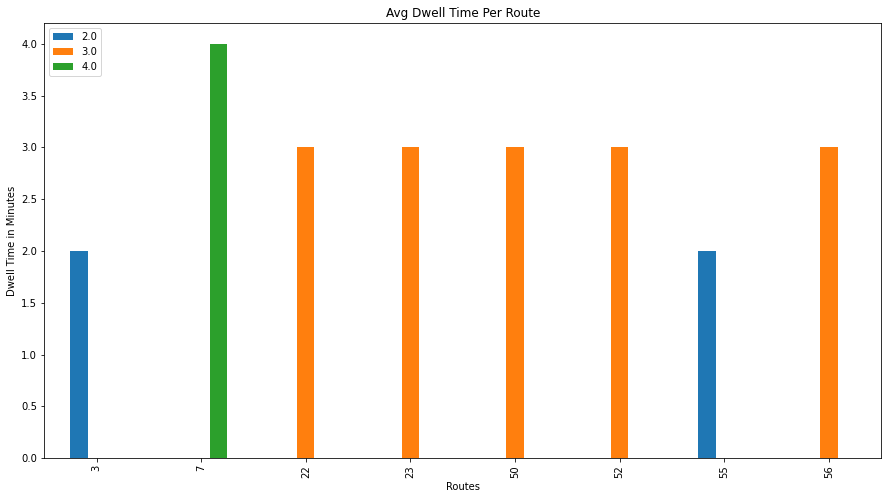

In [20]:
te_df1all.pivot(index='ROUTE_ABBR', columns='DWELL_IN_MINS', values='DWELL_IN_MINS').plot(kind='bar', figsize=(15,8))
plt.xlabel('Routes')
plt.ylabel('Dwell Time in Minutes')
plt.legend(loc='upper left')
plt.title('Avg Dwell Time Per Route')
plt.show();

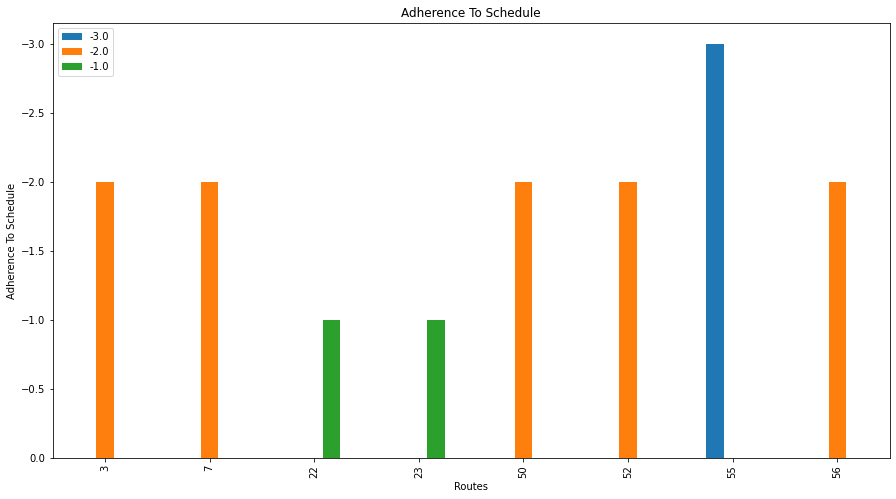

In [21]:
te_df1all.pivot(index='ROUTE_ABBR', columns='ADHERENCE', values='ADHERENCE').plot(kind='bar', figsize=(15,8))
plt.xlabel('Routes')
plt.ylabel('Adherence To Schedule')
plt.legend(loc='upper left')
plt.title('Adherence To Schedule')
plt.gca().invert_yaxis()
plt.show();

In [22]:
headway.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS
0,120211101,1,76447164,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,15.983333,1.983333,0,0,1,0,0.0,0,2,12.650000
1,120211101,1,76447165,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,17.333333,3.333333,0,0,1,0,0.0,0,11,0.000000
2,120211101,1,76447166,2021-11-01,7,1704,2088,297750,0,TO DOWNTOWN,...,NaN,NaN,0,1,0,0,NaN,0,23,22.416666
3,120211101,1,76447167,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,24,5.766666
4,120211101,1,76447168,2021-11-01,50,1704,2088,297749,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,25,0.000000


In [23]:
headway1 = headway[['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 'HDWY_DEV', 'ADHERENCE', 'DWELL_IN_MINS']][(headway['ROUTE_ABBR']== 55) & (headway['TRIP_ID']== 300293)]
headway1

,DATE,ROUTE_ABBR,TRIP_ID,ROUTE_DIRECTION_NAME,TRIP_EDGE,HDWY_DEV,ADHERENCE,DWELL_IN_MINS
3320,2021-11-01,55,300293,TO DOWNTOWN,1,NaN,-0.800000,8.6
3321,2021-11-01,55,300293,TO DOWNTOWN,0,NaN,-0.683333,0.0
3322,2021-11-01,55,300293,TO DOWNTOWN,0,NaN,-0.550000,0.0
3323,2021-11-01,55,300293,TO DOWNTOWN,0,NaN,0.100000,0.0
3324,2021-11-01,55,300293,TO DOWNTOWN,0,NaN,-1.166666,0.0
...,...,...,...,...,...,...,...,...
87133,2021-11-17,55,300293,TO DOWNTOWN,0,NaN,-0.750000,0.0
87134,2021-11-17,55,300293,TO DOWNTOWN,0,NaN,-1.300000,0.0
87135,2021-11-17,55,300293,TO DOWNTOWN,0,NaN,-0.200000,0.0
87136,2021-11-17,55,300293,TO DOWNTOWN,0,NaN,-0.583333,0.0


In [ ]:
headway_r55 = headway[['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 'HDWY_DEV', 'ADHERENCE', 'DWELL_IN_MINS']][(headway['ROUTE_ABBR']== 55)]
headway_r55

In [32]:
trip_id_unique = len(headway['TRIP_ID'].unique())
trip_id_unique

18495

In [ ]:
trip_id_r55= headway_r55.groupby(['TRIP_ID', 'ROUTE_DIRECTION_NAME', 'ROUTE_ABBR'], as_index=False)['ADHERENCE', 'DWELL_IN_MINS', 'HDWY_DEV'].mean()
trip_id_r55